In [111]:
import pandas as pd
import warnings
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [112]:
frog = pd.read_csv('frogs_mfcc.csv', sep=',')

In [113]:
# specify feature names & target names
x=frog[["MFCCs_ 1","MFCCs_ 2","MFCCs_ 3","MFCCs_ 4","MFCCs_ 5","MFCCs_ 6","MFCCs_ 7","MFCCs_ 8","MFCCs_ 9","MFCCs_10",
        "MFCCs_11","MFCCs_12","MFCCs_13","MFCCs_14","MFCCs_15","MFCCs_16","MFCCs_17","MFCCs_18","MFCCs_19",
        "MFCCs_20","MFCCs_21","MFCCs_22"]]
y=frog[["Species"]]

In [114]:
def interQuartile(x):
  percentile25= x.quantile(0.25)
  percentile75=x.quantile(0.75)
  iqr=percentile75-percentile25
  upperLimit= percentile75+1.5*iqr
  lowerLimit= percentile25-1.5*iqr
  return upperLimit, lowerLimit

upper,lower= interQuartile(x)
print("Lower limit calculated are: \n", lower)
print("Upper limit calculated are: \n", upper)

Lower limit calculated are: 
 MFCCs_ 1    1.000000
MFCCs_ 2   -0.284987
MFCCs_ 3   -0.299929
MFCCs_ 4    0.002050
MFCCs_ 5   -0.204594
MFCCs_ 6   -0.232482
MFCCs_ 7   -0.442713
MFCCs_ 8   -0.270433
MFCCs_ 9   -0.386471
MFCCs_10   -0.179418
MFCCs_11   -0.714684
MFCCs_12   -0.283475
MFCCs_13   -0.494030
MFCCs_14   -0.391186
MFCCs_15   -0.665846
MFCCs_16   -0.209441
MFCCs_17   -0.307307
MFCCs_18   -0.198139
MFCCs_19   -0.274680
MFCCs_20   -0.304439
MFCCs_21   -0.178478
MFCCs_22   -0.290896
dtype: float64
Upper limit calculated are: 
 MFCCs_ 1    1.000000
MFCCs_ 2    0.917498
MFCCs_ 3    0.869069
MFCCs_ 4    0.894548
MFCCs_ 5    0.478903
MFCCs_ 6    0.421020
MFCCs_ 7    0.402555
MFCCs_ 8    0.282432
MFCCs_ 9    0.656514
MFCCs_10    0.296011
MFCCs_11    0.471513
MFCCs_12    0.381976
MFCCs_13    0.815760
MFCCs_14    0.297364
MFCCs_15    0.427265
MFCCs_16    0.296938
MFCCs_17    0.507475
MFCCs_18    0.217905
MFCCs_19    0.174921
MFCCs_20    0.184810
MFCCs_21    0.250477
MFCCs_22    0.486248
d

In [115]:
print("Number of entries below the lower limit are \n", (x < lower).sum())
print("Number of entries above the upper limit are \n", (x > upper).sum())

Number of entries below the lower limit are 
 MFCCs_ 1    248
MFCCs_ 2     40
MFCCs_ 3     19
MFCCs_ 4    106
MFCCs_ 5    364
MFCCs_ 6      4
MFCCs_ 7      2
MFCCs_ 8    127
MFCCs_ 9     17
MFCCs_10    372
MFCCs_11      3
MFCCs_12    177
MFCCs_13     17
MFCCs_14     22
MFCCs_15      1
MFCCs_16    142
MFCCs_17     16
MFCCs_18     91
MFCCs_19     13
MFCCs_20      7
MFCCs_21     29
MFCCs_22      6
dtype: int64
Number of entries above the upper limit are 
 MFCCs_ 1      0
MFCCs_ 2     95
MFCCs_ 3    306
MFCCs_ 4     33
MFCCs_ 5     59
MFCCs_ 6     82
MFCCs_ 7    331
MFCCs_ 8     39
MFCCs_ 9      1
MFCCs_10    222
MFCCs_11      6
MFCCs_12    181
MFCCs_13      2
MFCCs_14    148
MFCCs_15     28
MFCCs_16    164
MFCCs_17      1
MFCCs_18     39
MFCCs_19     49
MFCCs_20     76
MFCCs_21     30
MFCCs_22      0
dtype: int64


In [116]:
# Splitting the training, test & validation set to 80:10:10 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_val.shape)
print(y_train.shape)
print(y_test.shape)

(4317, 22)
(1439, 22)
(1439, 22)
(1439, 1)
(4317, 1)
(1439, 1)


In [117]:
# importing the class
from sklearn.linear_model import SGDClassifier

logreg = SGDClassifier(loss='log', eta0=0.01, learning_rate='constant', penalty=None, max_iter=200, random_state=100, verbose=1)

In [118]:
# fit the model with training set
logreg.fit(x_train,y_train)

-- Epoch 1
Norm: 2.51, NNZs: 22, Bias: -0.956496, T: 4317, Avg. loss: 0.238322
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.70, NNZs: 22, Bias: -0.984429, T: 8634, Avg. loss: 0.160666
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.58, NNZs: 22, Bias: -1.162139, T: 12951, Avg. loss: 0.133215
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.26, NNZs: 22, Bias: -1.220887, T: 17268, Avg. loss: 0.117728
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.81, NNZs: 22, Bias: -1.297874, T: 21585, Avg. loss: 0.108086
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.29, NNZs: 22, Bias: -1.397362, T: 25902, Avg. loss: 0.101277
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 6.69, NNZs: 22, Bias: -1.494238, T: 30219, Avg. loss: 0.095998
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.06, NNZs: 22, Bias: -1.507157, T: 34536, Avg. loss: 0.091940
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 7.38, NNZs: 22, Bias: -1.642130, T: 38853, Avg. loss: 0.088615
To

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


SGDClassifier(eta0=0.01, learning_rate='constant', loss='log', max_iter=200,
              penalty=None, random_state=100, verbose=1)

In [119]:
# validating or optimizing the model using validation set

In [120]:
yval=logreg.predict(x_val)

In [121]:
from sklearn import metrics
from sklearn.metrics import classification_report
cnf_matrix = metrics.confusion_matrix(y_val, y_val)

In [122]:
# using the validation set we know that the
print("Accuracy against Validation set: \n",metrics.accuracy_score(yval, y_val))
print("Confusion Matrix: \n",cnf_matrix)
print("Classification Report: \n",classification_report(yval, y_val))

Accuracy against Validation set: 
 0.9214732453092426
Confusion Matrix: 
 [[144   0   0   0   0   0   0   0   0   0]
 [  0 702   0   0   0   0   0   0   0   0]
 [  0   0  98   0   0   0   0   0   0   0]
 [  0   0   0  56   0   0   0   0   0   0]
 [  0   0   0   0 111   0   0   0   0   0]
 [  0   0   0   0   0 222   0   0   0   0]
 [  0   0   0   0   0   0  40   0   0   0]
 [  0   0   0   0   0   0   0  27   0   0]
 [  0   0   0   0   0   0   0   0  11   0]
 [  0   0   0   0   0   0   0   0   0  28]]
Classification Report: 
                         precision    recall  f1-score   support

        AdenomeraAndre       0.97      0.93      0.95       150
AdenomeraHylaedactylus       1.00      0.98      0.99       714
    Ameeregatrivittata       0.85      0.86      0.85        97
            HylaMinuta       0.50      0.85      0.63        33
  HypsiboasCinerascens       0.93      0.95      0.94       108
     HypsiboasCordobae       0.99      0.78      0.87       281
   LeptodactylusFuscu

In [123]:
# finally, predicting the model with the test set

In [124]:
y_pred=logreg.predict(x_test)

In [125]:
print("Accuracy against Test set: \n",metrics.accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n",cnf_matrix)
print("Classification Report: \n",classification_report(y_pred, y_test))

Accuracy against Test set: 
 0.920778318276581
Confusion Matrix: 
 [[144   0   0   0   0   0   0   0   0   0]
 [  0 702   0   0   0   0   0   0   0   0]
 [  0   0  98   0   0   0   0   0   0   0]
 [  0   0   0  56   0   0   0   0   0   0]
 [  0   0   0   0 111   0   0   0   0   0]
 [  0   0   0   0   0 222   0   0   0   0]
 [  0   0   0   0   0   0  40   0   0   0]
 [  0   0   0   0   0   0   0  27   0   0]
 [  0   0   0   0   0   0   0   0  11   0]
 [  0   0   0   0   0   0   0   0   0  28]]
Classification Report: 
                         precision    recall  f1-score   support

        AdenomeraAndre       0.92      0.91      0.92       149
AdenomeraHylaedactylus       1.00      0.97      0.98       714
    Ameeregatrivittata       0.93      0.87      0.90       114
            HylaMinuta       0.44      0.93      0.60        27
  HypsiboasCinerascens       0.96      0.92      0.94        93
     HypsiboasCordobae       0.98      0.82      0.89       276
   LeptodactylusFuscus      

In [126]:
# algorithm to compare scores in each iteration
losses = []
iteration = []
tr = []
val = []
for i in range(1, 200):
    logreg = SGDClassifier(loss='log', eta0=0.01, learning_rate='constant', penalty=None, max_iter=i)
    logreg.fit(x_train, y_train)

    score_tr=logreg.score(x_train,y_train)
    score_val=logreg.score(x_val,y_val)

    iteration.append(i)
    tr.append(score_tr)
    val.append(score_val)

    print(i,"Iteration,", "Train: ", score_tr, ", Validation: ", score_val)

1 Iteration, Train:  0.714616631920315 , Validation:  0.7407922168172342
2 Iteration, Train:  0.8010192263145703 , Validation:  0.8207088255733148
3 Iteration, Train:  0.8149177669678017 , Validation:  0.8353022932592078
4 Iteration, Train:  0.8209404679175353 , Validation:  0.8346073662265462
5 Iteration, Train:  0.8290479499652537 , Validation:  0.8457261987491314
6 Iteration, Train:  0.8498957609451008 , Validation:  0.8610145934676859
7 Iteration, Train:  0.858003242992819 , Validation:  0.8693537178596248
8 Iteration, Train:  0.8654157980078758 , Validation:  0.8763029881862404
9 Iteration, Train:  0.8723650683344916 , Validation:  0.8832522585128562
10 Iteration, Train:  0.8793143386611072 , Validation:  0.891591382904795
11 Iteration, Train:  0.8853370396108409 , Validation:  0.8971507991660875
12 Iteration, Train:  0.8897382441510308 , Validation:  0.8971507991660875
13 Iteration, Train:  0.8969191568218671 , Validation:  0.906184850590688
14 Iteration, Train:  0.89576094510076

In [127]:
print("Max accuracy score against train set: ", max(tr))
print("Max accuracy score against validation set: ",max(val))

Max accuracy score against train set:  0.9182302524901552
Max accuracy score against validation set:  0.9270326615705351


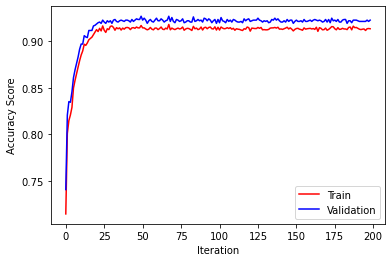

In [128]:
# graph comparison of the accuracy between training & validation set
plt.plot(tr,color="red",label="Train")
plt.plot(val,color="blue",label="Validation")
plt.ylabel("Accuracy Score")
plt.xlabel("Iteration")
plt.legend()
plt.show()